# Jellium
[?](?)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n, P_Ideal_Fermi_Gas, E_Ideal_Fermi_Gas, Degeneracy_Parameter, Fermi_Energy

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")


ModuleNotFoundError: No module named 'mendeleev'


### Set Parameters in Paper and Plot

In [2]:
name = 'Jellium'
Z, A = 1,1 

Te_eV = 1 # eV
rs_AU = 1
rs_cm = rs_AU/cm_to_AU
ne_cc = n_from_rs(rs_cm)
ne_AU = n_from_rs(rs_AU)

In [3]:
# Helpful unit functions
P_hnc_to_AU   = lambda P_hnc, ri: (P_hnc/ri**3) 
P_hnc_to_bar  = lambda P_hnc, ri: P_hnc_to_AU(P_hnc, ri) *  AU_to_bar 
P_hnc_to_Mbar = lambda P_hnc, ri: 1e-6*P_hnc_to_bar(P_hnc, ri)
P_hnc_to_GPa  = lambda P_hnc, ri: P_hnc_to_bar(P_hnc, ri) * 1e5 / 1e9 
E_hnc_to_eV   = lambda E_hnc: E_hnc/(3/(4*π)) * AU_to_eV

P_hnc_to_AU = np.vectorize(P_hnc_to_AU)
P_hnc_to_bar = np.vectorize(P_hnc_to_bar)
P_hnc_to_Mbar = np.vectorize(P_hnc_to_Mbar)
P_hnc_to_GPa = np.vectorize(P_hnc_to_GPa)
E_hnc_to_eV = np.vectorize(E_hnc_to_eV)

def get_jellium_P_Mbar(jellium_hnc):
    # jellium_hnc.h_r_matrix -= 1
    P_hnc = jellium_hnc.excess_pressure_matrix()
    # jellium_hnc.h_r_matrix += 1
    return P_hnc_to_Mbar(P_hnc)[0,0]

jellium_func = lambda Te_eV, ne_cc: PLASMA(1, 1, ne_cc, 1, Te_eV, Zbar=1, find_βuee=True,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'geometric'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':1000,'N_bins':50000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'tol':1e-12,'alpha_Picard':0.5, 'num_iterations':1e4})

### Plot Pauli Potential Comparison

In [4]:
jellium = jellium_func(1, 3e21)
jellium.run_jellium_hnc(ideal=True)
jellium.qsp.Te/jellium.qsp.E_F

Te_in_eV: 1.000
Ti_in_eV: 1.000
0: Initial condition Total Error: 2.794e-03


/home/zach/plasma/hnc/hnc/PIE.py:163: RuntimeWarning: overflow encountered in exp
  f_of_k = 1/(  1+np.exp((dense_hnc.k_array/self.qsp.ri)**2/(2*m_e*self.qsp.Te) - η) )


Exiting status 0, reverting to best index so far: 32
Final iter:33, Total Error: 8.949e-13


1.3184725247464628

Missing colon in file '~/plasma/hnc/hnc_paper.mplstyle', line 45 ("text.latex.preamble = r'\\boldmath'")


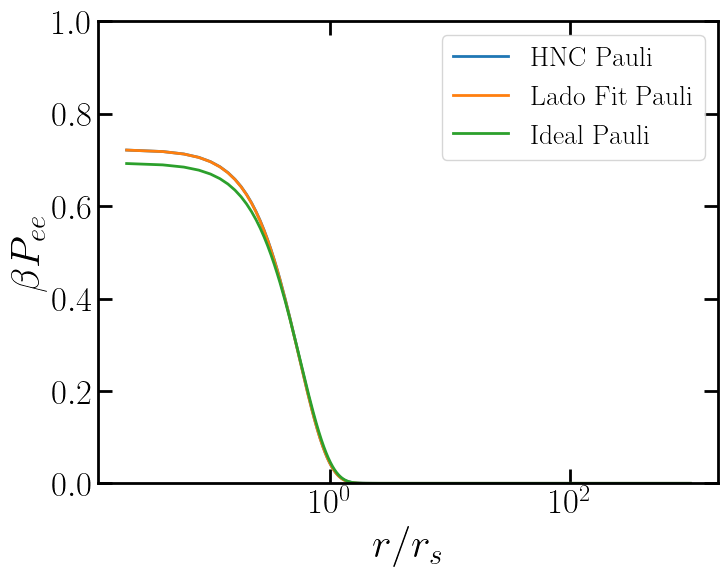

In [5]:
plt.style.use('~/plasma/hnc/hnc_paper.mplstyle')

fig, ax = plt.subplots()

r_array = jellium.jellium_hnc.r_array
ax.plot(r_array*rs_AU, jellium.βP_ee, label='HNC Pauli')
ax.plot(r_array*rs_AU, jellium.qsp.βv_Pauli(r_array, type='Lado'), label='Lado Fit Pauli')
ax.plot(r_array*rs_AU, jellium.qsp.βv_Pauli(r_array, type='ideal'), label='Ideal Pauli')

ax.set_xlabel(r"$r/r_s$")
ax.set_ylabel(r"$\beta P_{ee}$")

ax.set_ylim(-1e-10,1)
# ax.set_xlim(0,5*r_array[np.argmin(np.abs(jellium.βP_ee-1e-10))])
ax.set_xscale('log')
# ax.set_xlim(0,4)
# ax.set_yscale('symlog',linthresh=1e-10)
ax.legend()

#### Plot Radial Dsitribution Function

Missing colon in file '~/plasma/hnc/hnc_paper.mplstyle', line 45 ("text.latex.preamble = r'\\boldmath'")


(0.0, 5.0)

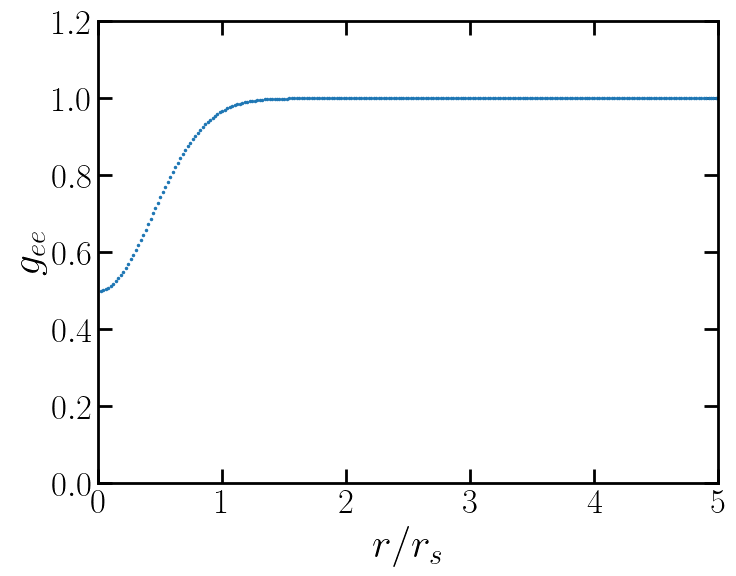

In [6]:
plt.style.use('~/plasma/hnc/hnc_paper.mplstyle')

fig, ax = plt.subplots()

ax.plot(jellium.jellium_hnc.r_array, jellium.jellium_hnc.h_r_matrix[0,0]+1,'.', label='Default Pauli')
# ax.plot(jellium.jellium_hnc.r_array, jellium.jellium_hnc.h_r_matrix[0,0]+1, label='Default Pauli')


ax.set_xlabel(r"$r/r_s$")
ax.set_ylabel(r"$g_{ee}$")

ax.set_ylim(0,1.2)
ax.set_xlim(0,5)

# Change of Pauli Potential with Density
We should recover $\beta u_P \propto E_F$

In [77]:
jellium_func = lambda Te_eV, ne_cc: PLASMA(1, 1, ne_cc, 1, Te_eV, Zbar=1, find_βuee=True,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'geometric'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':1000,'N_bins':50000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'tol':1e-12,'alpha_Picard':0.5, 'num_iterations':1e4})

In [78]:
# # Create new thermodynamic variable generator
def excess_energy_density_matrix(plasma, u_matrix ): # Defining   d_βu = dβ_c u/dβ = -T^2 d β_c u/dT
    g_matrix = plasma.jellium_hnc.h_r_matrix+1
    rho_matrix = plasma.jellium_hnc.rho[:,np.newaxis] * plasma.jellium_hnc.rho[np.newaxis,:]
    r = plasma.jellium_hnc.r_array[np.newaxis,np.newaxis,:]
    dr = plasma.jellium_hnc.del_r
    
    u_ex_matrix = np.sum(2*π*rho_matrix[:,:,np.newaxis]*u_matrix*g_matrix*r**2*dr,axis=2)
    return u_ex_matrix

dβu_dlnn_AU_list = []
def get_P_matrices(plasma_pair):
    plasma, plasma_ε = plasma_pair
    plasma_ε.run_jellium_hnc(ideal=True, c_s_k_guess = plasma.jellium_hnc.c_s_k_matrix.copy())
    dn_AU = plasma.ni_AU - plasma_ε.ni_AU
    n_AU = plasma.ni_AU
    r_AU = rs_from_n(n_AU)
 
     # Derivatives needed 
    dlnβcdlnn = (np.log(plasma.qsp.βe_c/plasma_ε.qsp.βe_c))/(np.log(plasma.ni_AU/plasma_ε.ni_AU))

    # Get pressures
    # Excess
    P_ex_standard = plasma.jellium_hnc.excess_pressure_matrix()
    P_ex_new = plasma.qsp.βe_c/plasma.qsp.βe*P_ex_standard

    # Ideal
    P_id_standard = plasma.qsp.Te * np.diag(plasma.jellium_hnc.rho)
    P_id_new      = plasma.qsp.Te * np.diag(plasma.jellium_hnc.rho)*(1 - 3/2*dlnβcdlnn)
    
    # New term
    dβu_dlnn_AU = n_AU*(plasma.jellium_hnc.βu_r_matrix - plasma_ε.jellium_hnc.βu_r_matrix)/dn_AU
    dβu_dlnn_AU_list.append(dβu_dlnn_AU)
    P_nonstandard = 1/plasma.qsp.βe * excess_energy_density_matrix(plasma,dβu_dlnn_AU  )
    
    # Compile results
    P_standard = P_ex_standard + P_id_standard
    P_id_Mbar, P_ex_Mbar, P_standard_Mbar, P_Mbar = P_hnc_to_Mbar(P_id_new,r_AU), P_hnc_to_Mbar(P_ex_new,r_AU), P_hnc_to_Mbar(P_standard,r_AU), P_hnc_to_Mbar(P_id_new + P_ex_new + P_nonstandard,r_AU)
    return P_id_Mbar, P_ex_Mbar, P_standard_Mbar, P_Mbar

def get_U_matrices(plasma_pair):
    plasma, plasma_ε = plasma_pair
    plasma_ε.run_jellium_hnc(ideal=True, c_s_k_guess = plasma.jellium_hnc.c_s_k_matrix.copy())
    n_AU = plasma.ni_AU
    r_AU = rs_from_n(n_AU)
    dT_AU = plasma.qsp.Te_c - plasma_ε.qsp.Te_c
    # Needed derivatives with respect to real inverse temperature
    dβc_dβ = (plasma.qsp.βe_c - plasma_ε.qsp.βe_c)/(plasma.qsp.βe - plasma_ε.qsp.βe)
    dβcu_dβ = (plasma.jellium_hnc.βu_r_matrix - plasma_ε.jellium_hnc.βu_r_matrix)/(plasma.qsp.βe - plasma_ε.qsp.βe ) 
    
    # Ideal
    E_id_standard = 3/2*plasma.jellium_hnc.Temp_matrix*np.diag(plasma.jellium_hnc.rho)
    E_id_new = E_id_standard * dβc_dβ  
    
    # Excess
    E_ex_standard = excess_energy_density_matrix(plasma, plasma.jellium_hnc.Temp_matrix[:,:,np.newaxis]*plasma.jellium_hnc.βu_r_matrix)
    E_ex_new = excess_energy_density_matrix(plasma, dβcu_dβ)
    
    # Compile results
    E_standard = E_id_standard + E_ex_standard
    E_new = E_id_new + E_ex_new
    E_id_eV, E_ex_eV, E_standard_eV, E_eV = [E_hnc_to_eV(E) for E in [E_id_new, E_ex_new, E_standard, E_new]]
    return E_id_eV, E_ex_eV, E_standard_eV, E_eV
    
def get_P(plasma, ε=1e-6):
    plasma_pair = [plasma, jellium_func(plasma.Te*AU_to_eV, plasma.ni_cc*(1-ε))]
    P_id_matrix, P_ex_matrix, P_st_matrix, P_matrix = get_P_matrices(plasma_pair)
    return np.sum(P_id_matrix), np.sum(P_ex_matrix), np.sum(P_st_matrix), np.sum(P_matrix)

def get_U(plasma, ε=1e-6):
    plasma_pair = [plasma, jellium_func(plasma.Te*AU_to_eV*(1-ε), plasma.ni_cc)]
    E_id_matrix, E_ex_matrix, E_st_matrix, E_matrix = get_U_matrices(plasma_pair)
    return np.sum(E_id_matrix), np.sum(E_ex_matrix), np.sum(E_st_matrix), np.sum(E_matrix)

In [79]:
ni_cc_list = np.geomspace(1e22,5e25,num=15)
Te_eV = 1

βP_list = []
βP_Lado_list = []
P_Pauli_list = []
E_Pauli_list = []
h_ee_list = []
βec_over_βe_list = []

for ni_cc in ni_cc_list:
    jellium = jellium_func(Te_eV, ni_cc)
    jellium.run_jellium_hnc(ideal=True)
    jellium.get_βPauli()
    
    βP_list.append( jellium.βP_ee )
    βP_Lado_list.append( jellium.qsp.βv_Pauli(jellium.jellium_hnc.r_array,type='Lado') )
    # jellium.jellium_hnc.βu_r_matrix = np.array([[jellium.βP_ee]])
    P_Pauli_list.append(  np.array(get_P(jellium)))
    E_Pauli_list.append(  np.array(get_U(jellium)))
    h_ee_list.append([jellium.ideal_jellium_r_array, jellium.ideal_jellium_h_r])
    βec_over_βe_list.append(jellium.qsp.βe_c/jellium.qsp.βe)
    

Te_in_eV: 1.000
Ti_in_eV: 1.000
0: Initial condition Total Error: 3.388e-03
Exiting status 0, reverting to best index so far: 35
Final iter:36, Total Error: 8.862e-13
Te_in_eV: 1.000
Ti_in_eV: 1.000
0: Initial condition Total Error: 7.498e-10
Exiting status 0, reverting to best index so far: 11
Final iter:12, Total Error: 8.369e-13
Te_in_eV: 1.000
Ti_in_eV: 1.000
0: Initial condition Total Error: 1.120e-09
Exiting status 0, reverting to best index so far: 12
Final iter:13, Total Error: 6.961e-13
Te_in_eV: 1.000
Ti_in_eV: 1.000
0: Initial condition Total Error: 3.774e-03
Exiting status 0, reverting to best index so far: 37
Final iter:38, Total Error: 7.378e-13
Te_in_eV: 1.000
Ti_in_eV: 1.000
0: Initial condition Total Error: 7.801e-10
Exiting status 0, reverting to best index so far: 11
Final iter:12, Total Error: 9.152e-13
Te_in_eV: 1.000
Ti_in_eV: 1.000
0: Initial condition Total Error: 1.169e-09
Exiting status 0, reverting to best index so far: 12
Final iter:13, Total Error: 7.876e-1

In [80]:
jellium.hnc.c_r_matrix

array([[[-4.27548924e+03, -2.13774462e+03, -1.42516308e+03, ...,
         -8.55132053e-02, -8.55114950e-02, -8.55097848e-02],
        [ 1.30590895e+01,  1.30463681e+01,  1.30336468e+01, ...,
          8.55132053e-02,  8.55114950e-02,  8.55097848e-02]],

       [[ 1.30590895e+01,  1.30463681e+01,  1.30336468e+01, ...,
          8.55132053e-02,  8.55114950e-02,  8.55097848e-02],
        [-1.02895143e+01, -1.02831501e+01, -1.02767860e+01, ...,
         -8.55132057e-02, -8.55114954e-02, -8.55097852e-02]]])

#### Pauli Potentials

Text(0.5, 0, '$r/r_e$')

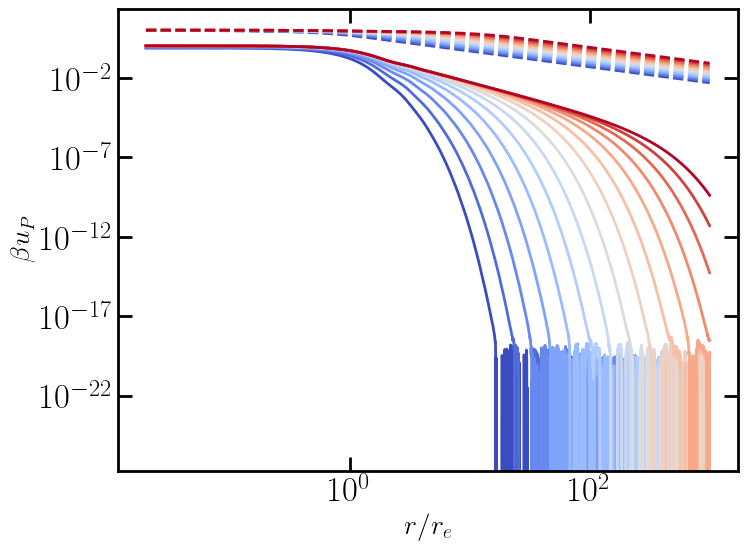

In [81]:
fig, ax  = plt.subplots()

colors = plt.cm.coolwarm(np.linspace(0,1,len(ni_cc_list)))

for i, (ni_cc, βP, βP_Lado) in enumerate(zip(ni_cc_list, βP_list, βP_Lado_list)):
    # ax.plot(jellium.hnc.r_array, np.log(βP), label=f'{ni_cc:0.3e} [1/cc] ')
    ax.plot(jellium.hnc.r_array, βP, label=f'{ni_cc:0.3e} [1/cc] ', color=colors[i])
    ax.plot(jellium.hnc.r_array, βP_Lado, label=f'{ni_cc:0.3e} [1/cc] ', color=colors[i], linestyle='--')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.legend()
ax.set_ylabel(r"$\beta u_P$", fontsize=20)
ax.set_xlabel(r"$r/r_e$", fontsize=20)

Text(0.5, 0, '$r/r_e$')

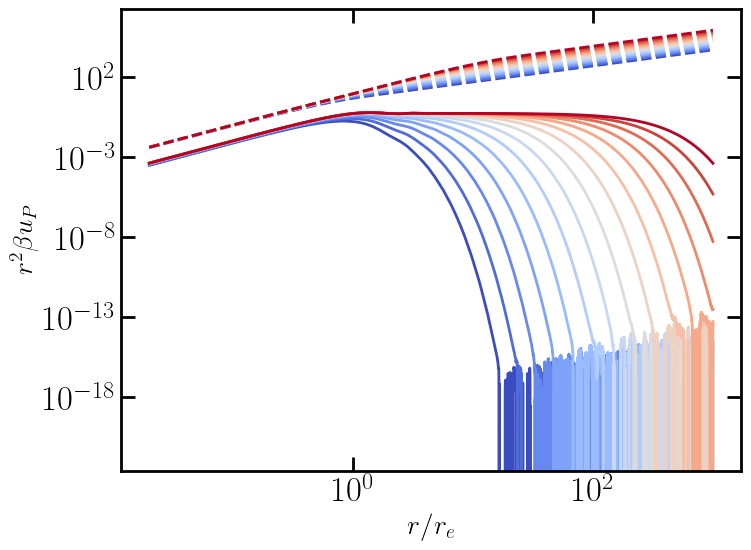

In [94]:
fig, ax  = plt.subplots()

colors = plt.cm.coolwarm(np.linspace(0,1,len(ni_cc_list)))

for i, (ni_cc, βP, βP_Lado) in enumerate(zip(ni_cc_list, βP_list, βP_Lado_list)):
    # ax.plot(jellium.hnc.r_array, np.log(βP), label=f'{ni_cc:0.3e} [1/cc] ')
    ax.plot(jellium.hnc.r_array,  βP*jellium.hnc.r_array**2, label=f'{ni_cc:0.3e} [1/cc] ', color=colors[i])
    ax.plot(jellium.hnc.r_array,  βP_Lado*jellium.hnc.r_array**2, label=f'{ni_cc:0.3e} [1/cc] ', color=colors[i], linestyle='--')

ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim(1e-4,1e0)
ax.set_ylabel(r"$r^2 \beta u_P$", fontsize=20)
ax.set_xlabel(r"$r/r_e$", fontsize=20)

Text(0.5, 0, '$r/r_e$')

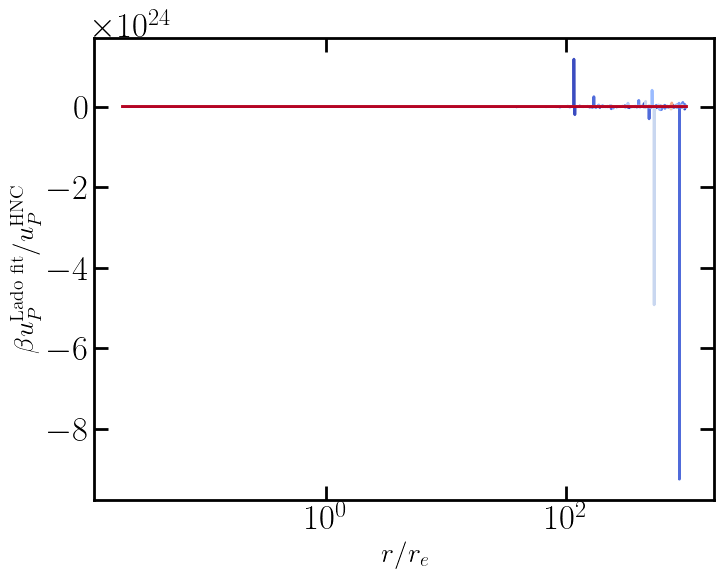

In [83]:
fig, ax  = plt.subplots()

colors = plt.cm.coolwarm(np.linspace(0,1,len(ni_cc_list)))

for i, (ni_cc, βP, βP_Lado) in enumerate(zip(ni_cc_list, βP_list, βP_Lado_list)):
    # ax.plot(jellium.hnc.r_array, np.log(βP), label=f'{ni_cc:0.3e} [1/cc] ')
    ax.plot(jellium.hnc.r_array,  βP_Lado/βP, label=f'{ni_cc:0.3e} [1/cc] ', color=colors[i])

# ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim(1e-1,1e1)
ax.set_ylabel(r"$\beta u_P^\text{Lado fit}/u_P^\text{HNC}$", fontsize=20)
ax.set_xlabel(r"$r/r_e$", fontsize=20)

Text(0.5, 0, '$r/r_e$')

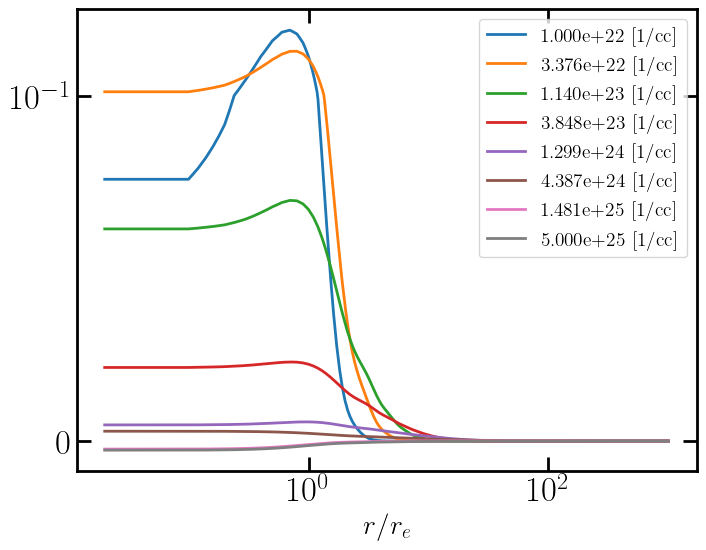

In [84]:
fig, ax  = plt.subplots()

for ni_cc, dβu_dlnn_AU, βec_over_βe in list(zip(ni_cc_list, dβu_dlnn_AU_list, βec_over_βe_list))[::2]:
    # ax.plot(jellium.hnc.r_array, np.log(βP), label=f'{ni_cc:0.3e} [1/cc] ')
    ax.plot(jellium.hnc.r_array, 1/βec_over_βe*dβu_dlnn_AU[0,0], label=f'{ni_cc:0.3e} [1/cc] ')
ax.set_yscale('symlog', linthresh=0.1)
ax.set_xscale('log')
ax.legend(fontsize=14)
ax.set_ylabel(r" ", fontsize=20)
ax.set_xlabel(r"$r/r_e$", fontsize=20)

#### Ideal $h_{ee}$

Text(0.5, 0, '$r/r_e$')

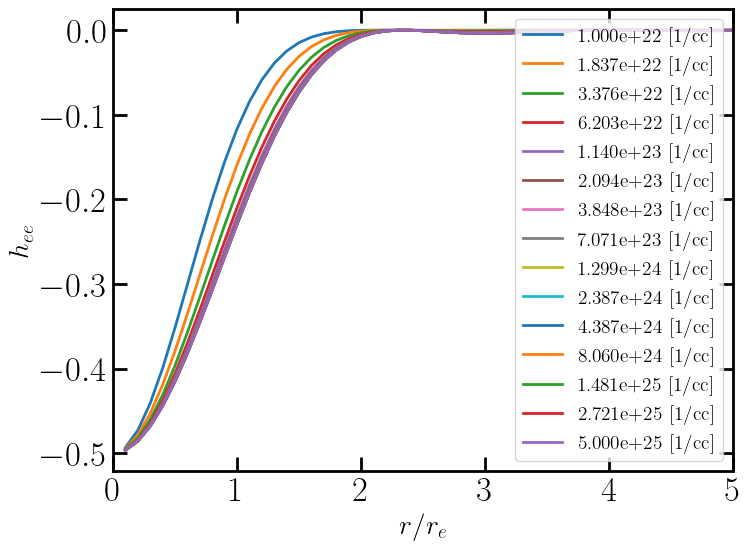

In [85]:
fig, ax  = plt.subplots()

for ni_cc, (r_array, h_ee) in zip(ni_cc_list, h_ee_list):
    ax.plot(r_array, h_ee, label=f'{ni_cc:0.3e} [1/cc] ')

ax.legend(fontsize=14)
# ax.set_ylim(-0.001,0.001)
ax.set_xlim(0,5)
ax.set_ylabel(r"$h_{ee}$", fontsize=20)
ax.set_xlabel(r"$r/r_e$", fontsize=20)

#### Pressure over density

Text(0.5, 0, '$n_i$ [1/cc]')

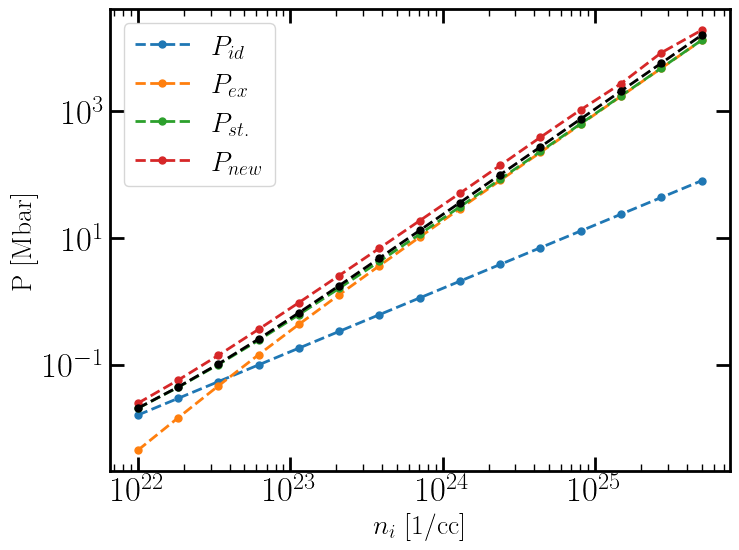

In [86]:
fig, ax  = plt.subplots()

P_ideal_Mbar = [P_Ideal_Fermi_Gas(Te_eV*eV_to_AU, ni_cc/cm_to_AU**3)*AU_to_bar/1e6  for ni_cc in ni_cc_list]

ax.plot(ni_cc_list, np.array(P_Pauli_list)[:,0],'--.', markersize=10, label=r'$P_{id}$')
ax.plot(ni_cc_list, np.array(P_Pauli_list)[:,1],'--.', markersize=10, label=r'$P_{ex}$')
ax.plot(ni_cc_list, np.array(P_Pauli_list)[:,2],'--.', markersize=10, label=r'$P_{st.}$')
ax.plot(ni_cc_list, np.array(P_Pauli_list)[:,3],'--.', markersize=10, label=r'$P_{new}$')
ax.plot(ni_cc_list, P_ideal_Mbar,'k--.',markersize=10)

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylabel("P [Mbar]", fontsize=20)
ax.set_xlabel(r"$n_i$ [1/cc]", fontsize=20)


In [87]:
np.array(P_Pauli_list)[:,3]/P_ideal_Mbar, 5/2*np.array(P_ideal_Mbar)/(np.array(ni_cc_list)/cm_to_AU**3*Fermi_Energy(np.array(ni_cc_list/cm_to_AU**3))*AU_to_bar/1e6)

(array([1.19820202, 1.28433005, 1.36788824, 1.42541394, 1.44760461,
        1.44589056, 1.43497598, 1.42359366, 1.40484913, 1.40547114,
        1.41836828, 1.39580361, 1.31139582, 1.4600857 , 1.20123393]),
 array([1.89698856, 1.48710235, 1.24824079, 1.11906923, 1.05472467,
        1.02463695, 1.01100522, 1.0049011 , 1.00217985, 1.00096893,
        1.00043052, 1.0001913 , 1.0000849 , 1.00003766, 1.00001665]))

#### Comparison to Ideal Pressure


Missing colon in file '~/plasma/hnc/hnc_paper.mplstyle', line 45 ("text.latex.preamble = r'\\boldmath'")


Text(0.5, 0, '$\\theta$')

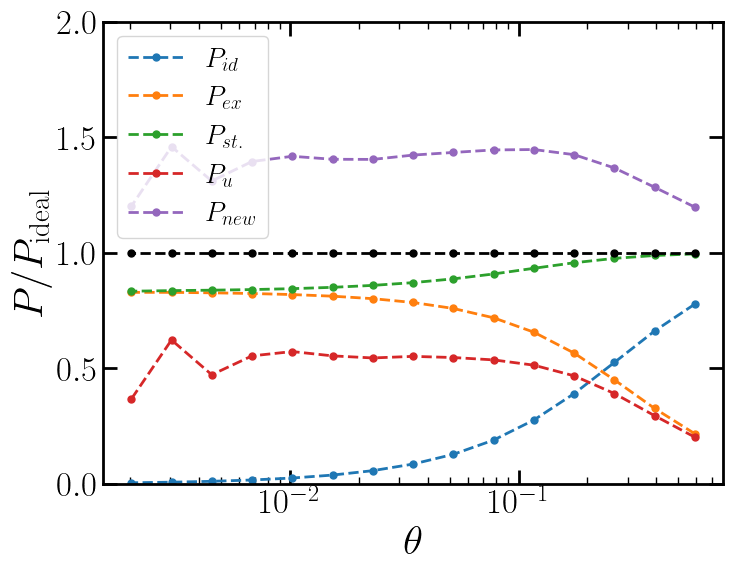

In [92]:
# Comparison to ideal pressure

plt.style.use('~/plasma/hnc/hnc_paper.mplstyle')
fig, ax  = plt.subplots()

P_ideal_Mbar = [P_Ideal_Fermi_Gas(Te_eV*eV_to_AU, ni_cc/cm_to_AU**3)*AU_to_bar/1e6  for ni_cc in ni_cc_list]
ni_cc_to_Θ = lambda ni_cc: Degeneracy_Parameter(jellium.qsp.Te, ni_cc/cm_to_AU**3)
ni_cc_list = np.array(ni_cc_list)

ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,0]/P_ideal_Mbar,'--.', markersize=10, label=r'$P_{id}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,1]/P_ideal_Mbar,'--.', markersize=10, label=r'$P_{ex}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,2]/P_ideal_Mbar,'--.', markersize=10, label=r'$P_{st.}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), (np.array(P_Pauli_list)[:,3]-np.array(P_Pauli_list)[:,1]-np.array(P_Pauli_list)[:,0] )/P_ideal_Mbar,'--.', markersize=10, label=r'$P_{u}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(P_Pauli_list)[:,3]/P_ideal_Mbar,'--.', markersize=10, label=r'$P_{new}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.ones_like(P_ideal_Mbar),'k--.',markersize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylim(0,2)
# ax.axvspan(0 ,ni_cc_to_Θ(ni_cc_list[-4]), color='k', alpha=0.2, linewidth=3)
# ax.vlines(ni_cc_to_Θ(ni_cc_list[-4]), 0,2, color='k', linewidth=2)
ax.set_ylabel(r'$P/P_\text{ideal}$')
ax.set_xlabel(r'$\theta$')

In [89]:
(np.array(P_Pauli_list)[:,2]/P_ideal_Mbar)[::-1]  + 1/8*((np.array(P_Pauli_list)[:,3]-np.array(P_Pauli_list)[:,1]-np.array(P_Pauli_list)[:,0] )/P_ideal_Mbar)[::-1]

array([0.88018742, 0.91480808, 0.89781018, 0.9106939 , 0.91695616,
       0.92040118, 0.92765773, 0.9404282 , 0.9561776 , 0.97606248,
       0.99775   , 1.01594255, 1.02539852, 1.02585713, 1.02108608])

#### Comparison to Ideal Energy


Missing colon in file '~/plasma/hnc/hnc_paper.mplstyle', line 45 ("text.latex.preamble = r'\\boldmath'")


Text(0.5, 0, '$\\theta$')

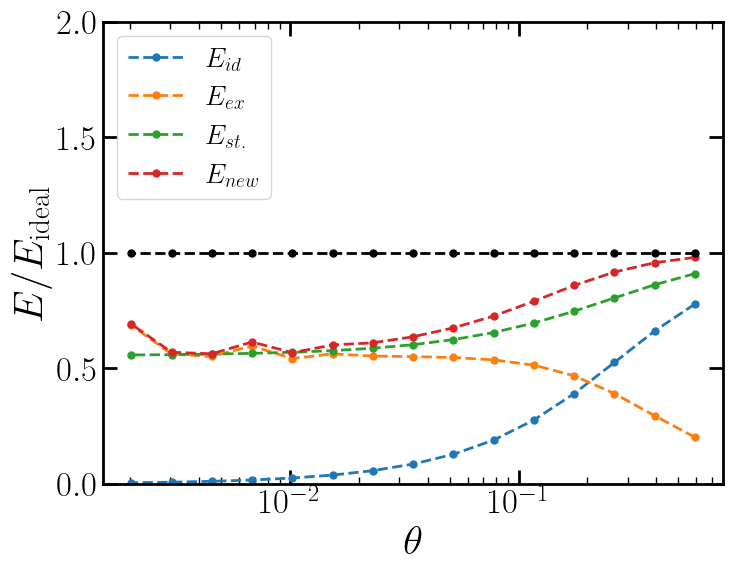

In [91]:
plt.style.use('~/plasma/hnc/hnc_paper.mplstyle')
fig, ax  = plt.subplots()

E_ideal_Mbar = [E_Ideal_Fermi_Gas(Te_eV*eV_to_AU, ni_cc/cm_to_AU**3)*AU_to_eV for ni_cc in ni_cc_list]
ni_cc_to_Θ = lambda ni_cc: Degeneracy_Parameter(jellium.qsp.Te, ni_cc/cm_to_AU**3)
ni_cc_list = np.array(ni_cc_list)

ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(E_Pauli_list)[:,0]/E_ideal_Mbar,'--.', markersize=10, label=r'$E_{id}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(E_Pauli_list)[:,1]/E_ideal_Mbar,'--.', markersize=10, label=r'$E_{ex}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(E_Pauli_list)[:,2]/E_ideal_Mbar,'--.', markersize=10, label=r'$E_{st.}$')
# ax.plot(ni_cc_to_Θ(ni_cc_list),(np.array(E_Pauli_list)[:,3]-np.array(E_Pauli_list)[:,1]-np.array(E_Pauli_list)[:,0] )/E_ideal_Mbar,'-', markersize=10, label=r'$E_{u}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.array(E_Pauli_list)[:,3]/E_ideal_Mbar,'--.', markersize=10, label=r'$E_{new}$')
ax.plot(ni_cc_to_Θ(ni_cc_list), np.ones_like(E_ideal_Mbar),'k--.',markersize=10)

ax.set_xscale('log')
# ax.set_yscale('log')
ax.legend(loc='upper left')
ax.set_ylim(0,2)
# ax.axvspan(0 ,ni_cc_to_Θ(ni_cc_list[-4]), color='k', alpha=0.2, linewidth=3)
# ax.vlines(ni_cc_to_Θ(ni_cc_list[-4]), 0,2, color='k', linewidth=2)
ax.set_ylabel(r'$E/E_\text{ideal}$')
ax.set_xlabel(r'$\theta$')